In [8]:
import numpy as np
import math
import matplotlib.pyplot as plt
import pygame

ImportError: 

IMPORTANT: PLEASE READ THIS FOR ADVICE ON HOW TO SOLVE THIS ISSUE!

Importing the numpy C-extensions failed. This error can happen for
many reasons, often due to issues with your setup or how NumPy was
installed.

We have compiled some common reasons and troubleshooting tips at:

    https://numpy.org/devdocs/user/troubleshooting-importerror.html

Please note and check the following:

  * The Python version is: Python3.9 from "D:\Users\Hao_Xu\anaconda3\envs\Robot\python.exe"
  * The NumPy version is: "1.23.1"

and make sure that they are the versions you expect.
Please carefully study the documentation linked above for further help.

Original error was: DLL load failed while importing _multiarray_umath: 找不到指定的模块。


In [7]:
# initialise real-time plot with pygame
def run_game(q_sim):
    pygame.init()  # start pygame
    window = pygame.display.set_mode((800, 600))  # create a window (size in pixels)
    window.fill((255, 255, 255))  # white background
    xc, yc = window.get_rect().center  # window center
    pygame.display.set_caption('robot arm')

    font = pygame.font.Font('freesansbold.ttf', 12)  # printing text font and font size
    text = font.render('robot arm', True, (0, 0, 0), (255, 255, 255))  # printing text object
    textRect = text.get_rect()
    textRect.topleft = (10, 10)  # printing text position with respect to the top-left corner of the window

    clock = pygame.time.Clock()  # initialise clock
    FPS = int(1 / dts)  # refresh rate

    # initial conditions
    state = []  # state vector

    # scaling
    window_scale = 400  # conversion from meters to pixles

    # wait until the start button is pressed
    run = True
    while run:
        for event in pygame.event.get():  # interrupt function
            if event.type == pygame.KEYUP:
                if event.key == ord('e'):  # enter the main loop after 'e' is pressed
                    run = False

    run = True
    while run:
    # MAIN LOOP
        for i in range(len(q_sim)):
            # update individual link position    
            x1 = l1 * np.cos(q_sim[i][0])
            y1 = l1 * np.sin(q_sim[i][0])
            x2 = x1 + l2 * np.cos(q_sim[i][0] + q_sim[i][1])
            y2 = y1 + l2 * np.sin(q_sim[i][0] + q_sim[i][1])
            # real-time plotting
            window.fill((255, 255, 255))  # clear window
            pygame.draw.circle(window, (0, 255, 0), (int(window_scale * p_ref[0]) + xc, int(-window_scale * p_ref[1]) + yc),
                               10)  # draw reference position

            pygame.draw.lines(window, (0, 0, 255), False, [(window_scale * x0 + xc, -window_scale * y0 + yc),
                                                           (window_scale * x1 + xc, -window_scale * y1 + yc),
                                                           (window_scale * x2 + xc, -window_scale * y2 + yc)], 3)  # draw
            # links
            pygame.draw.circle(window, (0, 0, 0), (int(window_scale * x0) + xc, int(-window_scale * y0) + yc),
                               7)  # draw shoulder / base
            pygame.draw.circle(window, (0, 0, 0), (int(window_scale * x1) + xc, int(-window_scale * y1) + yc),
                               7)  # draw elbow
            pygame.draw.circle(window, (255, 0, 0), (int(window_scale * x2) + xc, int(-window_scale * y2) + yc),
                               5)  # draw hand / endpoint
            text = font.render("FPS = " + str(round(clock.get_fps())), True, (0, 0, 0), (255, 255, 255))
            window.blit(text, textRect)
            pygame.display.flip()  # update display
            clock.tick(FPS)  # try to keep it real time with the desired step time 
        run = False
    pygame.quit()

In [20]:
def sim_in_2D(self,p,vec):
    fig = plt.figure(figsize=(20,20))
    p0 = [0,0]
    p1 = p[0][:2] #点p1的坐标值
    p2 = p[1][:2] #点p2的坐标值
    p3 = p[2][:2] #点p2的坐标值
    p4 = p[3][:2] #点p2的坐标值
    plt.subplot(2,2,1)
    plt.title('XY')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.xlim(-0.5,0.5) 
    plt.ylim(-0.5,0.5) 
    plt.plot((p0[0],p1[0],p2[0],p3[0],p4[0]),(p0[1],p1[1],p2[1],p3[1],p4[1])) 
    plt.grid(visible=True)
    plt.text(p1[0], p1[1], (p1[0], p1[1]))
    plt.text(p4[0], p4[1], (p4[0], p4[1]))
    ax = plt.gca()
    ax.set_aspect(1)
    plt.scatter((p3[0],p4[0]),(p3[1],p4[1]),color='black')
    plt.scatter((p1[0],p2[0]),(p1[1],p2[1]),color='red')
    plt.scatter((p1[0]),(p1[1]),color='yellow')
    plt.scatter((p0[0],p0[0]),(p0[1],p0[1]),color='pink')
    plt.subplot(2,2,2)
    plt.title('YZ')
    plt.xlabel('y')
    plt.ylabel('z')
    p0 = [0,0]
    p1 = p[0][1:] #点p1的坐标值
    p2 = p[1][1:] #点p2的坐标值
    p3 = p[2][1:] #点p2的坐标值
    p4 = p[3][1:] #点p2的坐标值
    plt.xlim(-0.5,0.5) 
    plt.ylim(-0.5,0.5) 
    plt.plot((p0[0],p1[0],p2[0],p3[0],p4[0]),(p0[1],p1[1],p2[1],p3[1],p4[1]))  
    plt.grid(visible=True)
    plt.text(p1[0], p1[1], (p1[0], p1[1]))
    plt.text(p4[0], p4[1], (p4[0], p4[1]))
    ax = plt.gca()
    ax.set_aspect(1)
    plt.scatter((p3[0],p4[0]),(p3[1],p4[1]),color='black')
    plt.scatter((p1[0],p2[0]),(p1[1],p2[1]),color='red')
    plt.scatter((p1[0]),(p1[1]),color='yellow')
    plt.scatter((p0[0],p0[0]),(p0[1],p0[1]),color='pink')
    plt.subplot(2,2,3)
    plt.title('XZ')
    plt.xlabel('x')
    plt.ylabel('z')
    p0 = [0,0]
    p1 = p[0][[0,2]] #点p1的坐标值
    p2 = p[1][[0,2]] #点p2的坐标值
    p3 = p[2][[0,2]] #点p2的坐标值
    p4 = p[3][[0,2]] #点p2的坐标值
    plt.xlim(-0.5,0.5) 
    plt.ylim(-0.5,0.5) 
    plt.plot((p0[0],p1[0],p2[0],p3[0],p4[0]),(p0[1],p1[1],p2[1],p3[1],p4[1])) 
    plt.grid(visible=True)
    plt.text(p1[0], p1[1], (p1[0], p1[1]))
    plt.text(p4[0], p4[1], (p4[0], p4[1]))
    ax = plt.gca()
    ax.set_aspect(1)
    plt.scatter((p3[0],p4[0]),(p3[1],p4[1]),color='black')
    plt.scatter((p1[0],p2[0]),(p1[1],p2[1]),color='red')
    plt.scatter((p1[0]),(p1[1]),color='yellow')
    plt.scatter((p0[0],p0[0]),(p0[1],p0[1]),color='pink')
    plt.show()

In [21]:
'''ROBOT MODEL'''
class robot_arm_2dof:
    def __init__(self, l):
        self.l = l  # link length
        self.q = np.zeros([2])  # joint position
        self.q2 = np.zeros([2])  # joint position

    # forward kinematics
    def FK(self, q):
        p = np.zeros([2])  # endpoint position
        p[0] = self.l[0] * math.cos(self.q[0]) + self.l[1] * math.cos(self.q[1] + self.q[0])
        p[1] = self.l[0] * math.sin(self.q[0]) + self.l[1] * math.sin(self.q[1] + self.q[0])
        return p

    def FK_DH(self, q):
        p = np.zeros([2])  # endpoint position
        # DH parameter
        alpha = np.zeros([2])
        a = np.zeros([2])
        a[0] = self.l[0]
        a[1] = self.l[1]
        d = np.zeros([2])
        theta = np.zeros([2])
        theta[0] = self.q[0]
        theta[1] = self.q[1]
        A = np.identity(4)
        for i in range(2):
            T_zd = np.array([[1, 0, 0, 0], [0, 1, 0, 0], [0, 0, 1, d[i]], [0, 0, 0, 1]])
            T_ztheta = np.array(
                [[np.cos(theta[i]), -np.sin(theta[i]), 0, 0], [np.sin(theta[i]), np.cos(theta[i]), 0, 0], [0, 0, 1, 0],
                 [0, 0, 0, 1]])
            T_xa = np.array([[1, 0, 0, a[i]], [0, 1, 0, 0], [0, 0, 1, 0], [0, 0, 0, 1]])
            T_xalpha = np.array(
                [[1, 0, 0, 0], [0, np.cos(alpha[i]), -np.sin(alpha[i]), 0], [0, np.sin(alpha[i]), np.cos(alpha[i]), 0],
                 [0, 0, 0, 1]])
            A = A.dot(T_zd.dot(T_ztheta.dot(T_xa).dot(T_xalpha)))
            print(A)
        p = A.dot(np.array([0, 0, 0, 1]))
        return p[0:2]

    # Jacobian matrix
    def Jacobian(self):
        J = np.zeros([2, 2])
        J[0, 0] = self.l[0] * (-math.sin(self.q[0]) - self.l[1] * math.sin(self.q[0] + self.q[1]))
        J[0, 1] = self.l[1] * (-math.sin(self.q[1] + self.q[0]))
        J[1, 0] = self.l[0] * math.cos(self.q[0]) + l[1] * math.cos(self.q[0] + self.q[1])
        J[1, 1] = self.l[1] * (math.cos(self.q[0] + self.q[1]))

        return J

    # inverse kinematics
    def IK_Analytical(self, p):
        q = np.zeros([2])
        r = np.sqrt(p[0] ** 2 + p[1] ** 2)
        q[1] = np.pi - math.acos((self.l[0] ** 2 + self.l[1] ** 2 - r ** 2) / (2 * self.l[0] * self.l[1]))
        q[0] = math.atan2(p[1], p[0]) - math.acos((self.l[0] ** 2 - self.l[1] ** 2 + r ** 2) / (2 * self.l[0] * r))

        return q

    # inverse kinematics
    def IK_Numerical(self, p):
        q_sim = []
        error = p - self.FK(self.q)
        while abs(np.linalg.norm(error)) > 0.0001:
            J = self.Jacobian()
            # print(np.linalg.inv(J))
            self.q = self.q + np.linalg.inv(J).dot(error)
            error = p - self.FK(self.q)
            q_sim.append(self.q)
        return self.q, q_sim

    # state change
    def Init_state(self, q):
        self.q = q

In [22]:
'''SIMULATION'''
# SIMULATION PARAMETERS
dt = 1  # intergration step timedt = 0.01 # integration step time
dts = dt * 1  # desired simulation step time (NOTE: it may not be achieved)

# ROBOT PARAMETERS
x0 = 0.0  # base x position
y0 = 0.0  # base y position
l1 = 0.3  # link 1 length
l2 = 0.3  # link 2 length
l = [l1, l2]  # link length

# REFERENCE TRAJETORY
ts = dt  # trajectory size
x = 1
y = 1

# SIMULATOR
# initialise robot model class
model = robot_arm_2dof(l)
q_init = [-np.pi, np.pi/2]
model.Init_state(q_init)
p_ref = [0.0, 0.6]  # reference endpoint trajectory
q_IK_numerical, q_sim = model.IK_Numerical(p_ref)
print("iteration for", len(q_sim))
q_IK_analytical = model.IK_Analytical(p_ref)
pr_numerical = model.FK(q_IK_numerical)

iteration for 28


In [23]:
class robotarm_3RP:
    def __init__(self,q):
        self.q = q  # joint position
    def FK_SDH(self):
        theta = [np.pi/2 + self.q[0], 0, -np.pi/2+ self.q[2], + self.q[3]]
        d = [0.032, 0.0528+self.q[1] , 0.256, 0]
        a =  [0, 0, -0.03, 0]
        alpha = [-np.pi/2, 0, -np.pi/2, 0]
        A = np.identity(4)
        p = []
        for i in range(4):
            T_zd = np.array([[1, 0, 0, 0], [0, 1, 0, 0], [0, 0, 1, d[i]], [0, 0, 0, 1]])
            T_ztheta = np.array(
                [[np.cos(theta[i]), -np.sin(theta[i]), 0, 0], 
                 [np.sin(theta[i]), np.cos(theta[i]), 0, 0], 
                 [0, 0, 1, 0],
                 [0, 0, 0, 1]])
            T_xa = np.array([[1, 0, 0, a[i]], 
                             [0, 1, 0, 0], 
                             [0, 0, 1, 0], 
                             [0, 0, 0, 1]])
            T_xalpha = np.array(
                [[1, 0, 0, 0], 
                 [0, np.cos(alpha[i]), -np.sin(alpha[i]), 0], 
                 [0, np.sin(alpha[i]), np.cos(alpha[i]), 0],
                 [0, 0, 0, 1]])
            
            A = A.dot(T_zd.dot(T_ztheta.dot(T_xa).dot(T_xalpha)))
            temp = A.dot(np.array([0, 0, 0, 1]))
            p.append(np.around(temp,3))
        return p, A
    
        
    def IK_analytical(self,T_in_End):
#         q = np.zeros([2])
        temp = self.FK_SDH()
        self.q[1] = (math.sqrt(T_in_End[1,3]**2+T_in_End[0,3]**2)-abs(self.FK_SDH()[0][3][0]))
        self.q[0] = math.atan(T_in_End[1,3]/T_in_End[0,3])   
        print(abs(self.FK_SDH()[0][3][0]))
        print(T_in_End[1,3]**2+T_in_End[0,3]**2)
        print(-(math.sqrt(T_in_End[1,3]**2+T_in_End[0,3]**2)-abs(self.FK_SDH()[0][3][0])))
        print("q1: ",self.q[1])
        print("q0: ",self.q[0])
        return q
    def IK_numerical(self):
        
        return
    def Jacobian(self):
        return

p: 
 [array([0.   , 0.   , 0.032, 1.   ]), array([-0.053,  0.   ,  0.032,  1.   ]), array([-0.309,  0.   ,  0.002,  1.   ]), array([-0.309,  0.   ,  0.002,  1.   ])] 
 T: 
 [[ 0.      1.     -0.     -0.3088]
 [ 0.      0.      1.      0.    ]
 [ 1.     -0.     -0.      0.002 ]
 [ 0.      0.      0.      1.    ]]


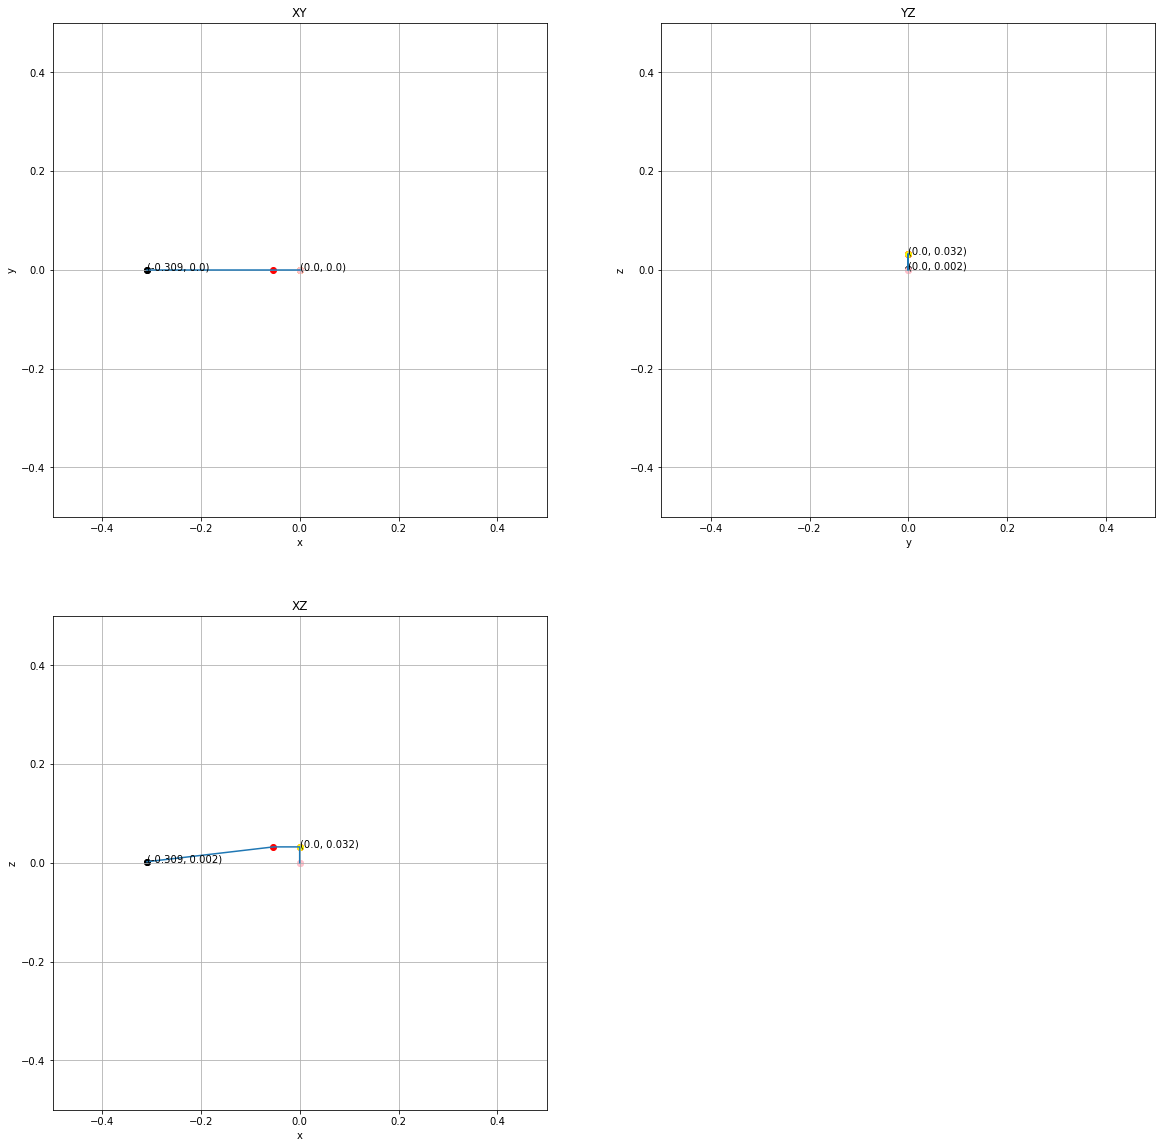

In [25]:
# SIMULATOR
# initialise robot model class
q = np.array([0,0,0,0])
p = np.array([0,0,0])
vec = np.array([1,1,1])
model = robotarm_3RP(q)
# T = np.array([[0,0,0,-0.5],
#              [0,0,0,-0.5],
#              [0,0,0,3],
#              [0,0,0,3]])
# model.IK_analytical(T)
p,T2 = model.FK_SDH()
print("p: \n",p,"\n","T: \n",np.around(T2,10))
sim_in_2D(q,p,vec)

In [ ]:
math.atan2(1,1)